In [7]:
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers, utils, metrics
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import plot_model

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ai_or_not.zip

In [10]:
folder='/content/Ai_Or_Not/'

In [11]:
def Plot_metrics(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
def evaluate_model(model,val_images,val_labels):
    predictions = model.predict(val_images)
    y_pred = np.round(predictions)  # Adjusted for binary classification
    y_true = val_labels

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=['real', 'fake'])
    print('Classification Report:')
    print(report)


In [22]:
classes = ['train/images','fake']
class_names_label = {class_name:j for j, class_name in enumerate(classes)}
images = []
labels = []
for i in classes:
 paths = glob.glob(folder+i +"/*.*")
 for img_path in paths:
      image = cv2.imread(img_path)
      image = cv2.resize(image,(150,150))
      image = image/255
      label = class_names_label[i]
      images.append(image)
      labels.append(label)
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32')


In [23]:
X_train, X_test, labels_train, labels_test = train_test_split(images,labels, test_size=0.2, random_state=42)

# Model1: CNN

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [20]:
trained_model = model.fit(X_train, labels_train, epochs=10, validation_split = 0.2)

Epoch 1/10
61/61 [==============================] - 86s 1s/step - loss: 0.0763 - accuracy: 0.9727 - val_loss: 1.7379 - val_accuracy: 0.7588
Epoch 2/10
61/61 [==============================] - 84s 1s/step - loss: 0.0751 - accuracy: 0.9737 - val_loss: 0.2251 - val_accuracy: 0.9216
Epoch 3/10
61/61 [==============================] - 81s 1s/step - loss: 0.0112 - accuracy: 0.9985 - val_loss: 0.2439 - val_accuracy: 0.9299
Epoch 4/10
61/61 [==============================] - 86s 1s/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.2991 - val_accuracy: 0.9258
Epoch 5/10
61/61 [==============================] - 87s 1s/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.2970 - val_accuracy: 0.9237
Epoch 6/10
61/61 [==============================] - 83s 1s/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.2898 - val_accuracy: 0.9320
Epoch 7/10
61/61 [==============================] - 82s 1s/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.2986 - val_accuracy: 0.9320
Epoch 8/10
61/61 [==

In [22]:
model.save("/content/drive/MyDrive/Damagedcars/AI_Or_Not.h5")
model.save("/content/drive/MyDrive/Damagedcars/AI_Or_Not.keras")

In [23]:
model.evaluate(X_test,labels_test,verbose=1)

19/19 [==============================] - 8s 411ms/step - loss: 0.2889 - accuracy: 0.9340


[0.2889465093612671, 0.933993399143219]

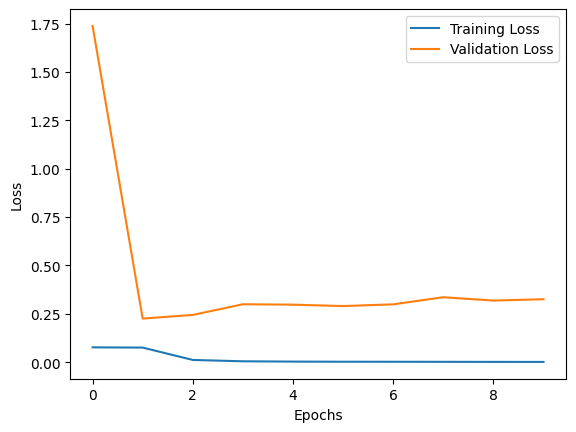

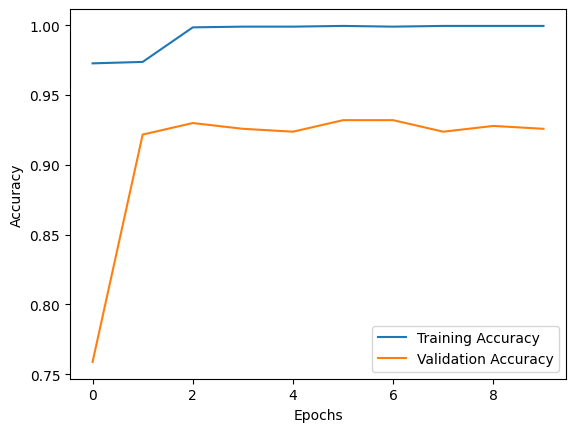

In [34]:
Plot_metrics(trained_model)

In [46]:
evaluate_model(model,X_test,labels_test)

19/19 [==============================] - 7s 353ms/step
Classification Report:
              precision    recall  f1-score   support

        real       0.96      0.92      0.94       346
        fake       0.90      0.95      0.92       260

    accuracy                           0.93       606
   macro avg       0.93      0.94      0.93       606
weighted avg       0.94      0.93      0.93       606



1/1 [==============================] - 0s 45ms/step
[[0.9999963]]
1


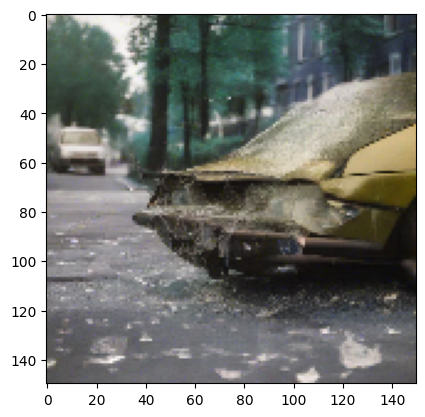

In [31]:
#test on a validation image
import matplotlib.pyplot as plt
test_image = X_test[22]
test_image = np.reshape(test_image,(1,150,150,3))
result = model.predict(test_image)
print(result)
print(labels_test[22])
plt.imshow(X_test[22])
plt.show()

# Model2: VGG16

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [4]:
train_dir = '/content/Ai_Or_Not'
img_height, img_width = 224, 224
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)


In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 2424 images belonging to 2 classes.
Found 606 images belonging to 2 classes.


In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(1, activation='sigmoid')(x)

# fine-tuned model
model2 = Model(base_model.input, output)

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Fine-tune the model
epochs = 20
history = model2.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

In [15]:
model2.save("/content/drive/MyDrive/Damagedcars/AI_Or_Not2.h5")
model2.save("/content/drive/MyDrive/Damagedcars/AI_Or_Not2.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
model2.evaluate(val_generator,verbose=1)

19/19 [==============================] - 405s 21s/step - loss: 0.2715 - accuracy: 0.9026


[0.27149707078933716, 0.9026402831077576]